## Install Kaggle API

In [0]:
!pip install kaggle

In [0]:
# Check for a directory called .kaggle under the content
!ls -a

In [0]:
# Create directory 
!mkdir .kaggle

In [0]:
import json

token = {"username":"*******","key":"**************************"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

## Download Data

In [9]:
!kaggle competitions download -c titanic -p /content

  0%|                                               | 0.00/59.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 59.8k/59.8k [00:00<00:00, 28.6MB/s]
  0%|                                               | 0.00/28.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 28.0k/28.0k [00:00<00:00, 22.8MB/s]
  0%|                                               | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.18k/3.18k [00:00<00:00, 3.78MB/s]




---



---



# 1. Problem Definition

The sinking of the RMS TItanic is one of the most infamous shipwrecks in history. Although there was some element of luck involved in surviving the sinking, some group of people were more likely to survive than others, such as women, children, and the upper-class.


**Objective** - To analyze what sorts of people were likely to survive.

In [0]:
# Data analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Loading Data

In [0]:
# Load csv to pandas dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
# Train dataset
print('No. of rows in train dataset    : {0}'.format(len(train)))
print('No. of columns in train dataset : {0}'.format(len(train.loc[0])))
train.head()

No. of rows in train dataset    : 891
No. of columns in train dataset : 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Test dataset
print('No. of rows in test dataset    : {0}'.format(len(test)))
print('No. of columns in test dataset : {0}'.format(len(test.loc[0])))
test.head()

No. of rows in test dataset    : 418
No. of columns in test dataset : 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# Combine to run certain operations together
combine = [train, test]

### Analyze Data

In [15]:
# To print the names of all the features available
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Features

*   **Categorical** - Survived, Sex, Embarked
*   **Ordinal** - Pclass
*   **Numerical** - Age, Fare, Parch, SibSp
*   **Mixed** - Ticket, Cabin




In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
## Distribution of numerical features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
## Distribution of categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Miss. Anna Katherine ""Annie Kate""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### Analyze by pivoting features



In [21]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Pclass** - Significant correlation among Pclass=1 & Survived. We should include this feature.

In [22]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Sex** - Female had very high survival rate. We must include this feature.

In [23]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**SibSp and Parch** - These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these.

### Analyze by Visualizing Data

**Correlating Numerical Features**

A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. 

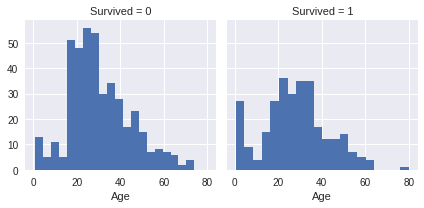

In [25]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

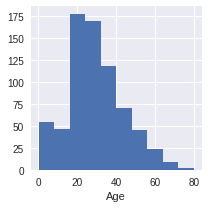

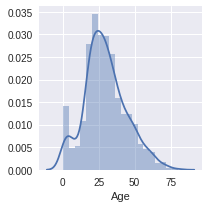

In [26]:
sns.FacetGrid(train).map(plt.hist, "Age")
sns.FacetGrid(train).map(sns.distplot, 'Age')

**Observations**


*   Infants had high survival rate.
*   Oldest passengers (Age=80) survived.
*   Large number of 15-25 year olds dit not survive.
*   Most passengers are in 15-35 age range.



**Decisions**

*   We should consider Age in our model training.
*   Complete the Age features for null values.
*   We should band age groups.



**Correlating numerical and ordinal features**



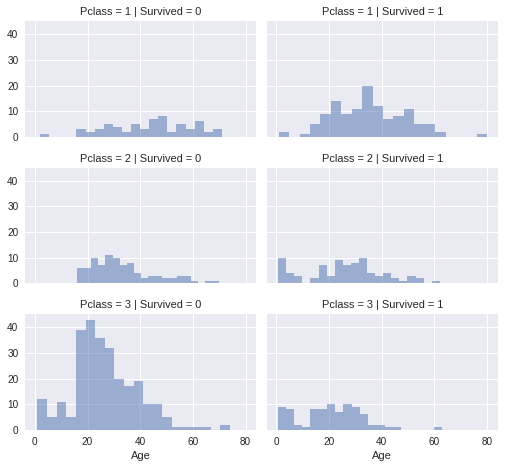

In [27]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Observations**

*   Pclass=3 had most passengers, however most did not survive.
*   Most passengers in Pclass=1 survived. 

**Decision**

*  We should consider Pclass for model training.

**Correlating categorical features**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


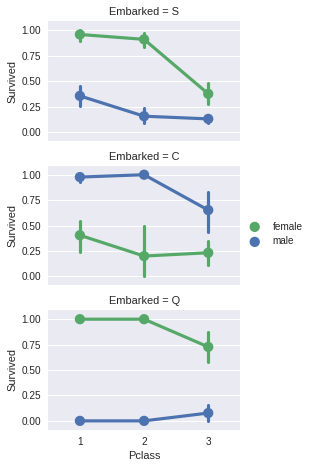

In [28]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations**

*   Females had much better survival rate than males. 
*   Exception in Embarked=C where males had higher survival rate. 
*   Males had better survival rate in Pclass=3 when compared with Pclass=2 for C & Q ports.
*   Ports of embarkation have varying survival rates for Pclass=3 & among male passengers.

**Decisions**

*   Add Sex feature to model training.
*   Complete and add Embarked feature to model training. 

**Correlating categorical and numerical features**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


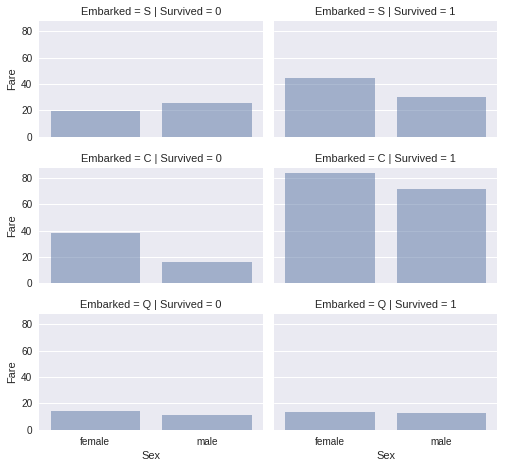

In [29]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations**

* Higher fare paying passengers had better survival. 
* Port of embarkation correlates with survival rates. 


**Decisions**

* Consider banding Fare feature.

# 3. Wrangle data 

We have made several assumptions and decisions regarding our datasets and solution requirements. Lets now execute our decisions and assumptions for correcting, creating, and completing goals. 

### Correcting by dropping features

Based on our observations and decisions, drop Cabin and Ticket features. 

In [30]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket','Cabin'], axis=1)
test = test.drop(['Ticket','Cabin'], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Creating new feature from existing 

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival.




In [31]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [33]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)
  
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [34]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

**Converting a categorical feature**

Convert features which contain strings to numerical values

In [35]:
# Converting Sex feature - Male = 0, Female = 1
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
  
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Completing a numerical continuous feature**

(Age)

1. A simple way is to generate random numbers b/w mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using  median values for Age across sets of Pclass and Gender feature combinations. So median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on.

1st method wil introduce some noise into our models. 


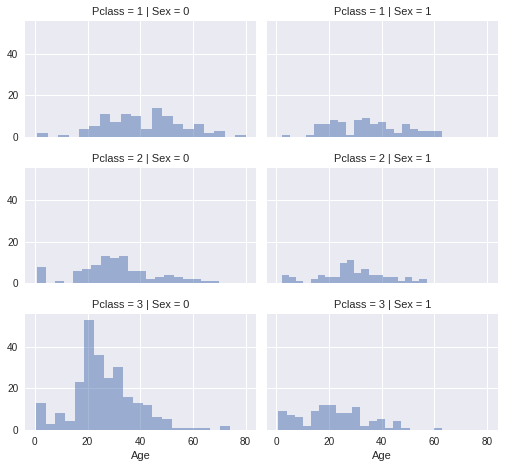

In [36]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [37]:
# Preparing an empty array to contain guessed Age values based on Pclass * Gender combinations

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [38]:
for dataset in combine:
  for i in range(0, 2):
    for j in range(0, 3):
      guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
      age_guess = guess_df.median()
      # Convert random age to nearest .5 age
      guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
      
  for i in range(0, 2):
    for j in range(0, 3):
      dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
      
  dataset['Age'] = dataset['Age'].astype(int)
  
train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [39]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:
# Replace Age with ordinals based on these bands

for dataset in combine:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [41]:
# We can now remove the AgeBand feature

train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**Create new feature combining existing feature**

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [42]:
for dataset in combine:
  dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
  
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [43]:
# We can create feature called IsAlone
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
  
train[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [44]:
train = train.drop(['FamilySize','Parch','SibSp'], axis=1)
test = test.drop(['FamilySize','Parch','SibSp'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [45]:
# We can also create an artificial feature combining PClass and Age
for dataset in  combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass
  
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**Completing a categorical feature**

Embarked - Completing it with the most common occurence.

In [46]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
  
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Converting categorical feature to numeric**

In [48]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


**Completing numeric feature and converting it to categorical**

In [49]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


In [50]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [51]:
# Converting the Fare feature to ordinal values based on the FareBand
for dataset in combine:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] >14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)
  
train = train.drop(['FareBand'], axis=1)
combine = [train, test]

train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [52]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


# 4. Model, Predict and Solve

In [53]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test  = test.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Logistic Regression

In [54]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.26

In [55]:
# We can use Logistic Regression to validate our assumptions and decisions. 
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


Positive coefficients increase the log-odds of the response (& thus increase the probability), and negative coefficients decrease the  log-odds of the response (& thus decrease the probability).


*   Sex is the highest positive coefficient, impying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
*   Inversely as Pclass increases, probability of SUrvived=1 decreses the most.
*   Age * Class is a good artificial feature to model as it has second highest negative correlation with Survived.
*   So is Title as second highest positive correlation.



## Support Vector Machines

In [56]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

## K-Nearest Neighbors

In [57]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.06

## Gaussian Naive Bayes

In [58]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

76.88

## Perceptron

In [59]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.79

## Linear SVC

In [60]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
acc_linear_svc

79.46

## Stochastic Gradient Descent


In [61]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.87

## Decision Tree

In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

86.64

## Random Forest

In [63]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

86.64

# Model Evaluation

In [64]:
models = pd.DataFrame({'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', \
                                  'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
                      'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Descent,75.87


In [0]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'],
                          "Survived": Y_pred
                          })

submission.to_csv('submission.csv', index=False)